In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import time
from datetime import datetime 
import scipy.stats as stats
import statsmodels.api as sm

US= pd.read_csv('US.csv')
X = US.iloc[:, :-1] #Take all the columns except last one
y = US.iloc[:, -1] #Take the last column as the result


In [2]:
US.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [3]:
US.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30843 entries, 0 to 30842
Data columns (total 6 columns):
date      30843 non-null object
county    30843 non-null object
state     30843 non-null object
fips      30388 non-null float64
cases     30843 non-null int64
deaths    30843 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 1.4+ MB


In [4]:
from sklearn.impute import SimpleImputer
imr = SimpleImputer(strategy="constant")

In [5]:
imr = imr.fit(US.values)

In [6]:
imputed_data = imr.transform(US.values)

In [7]:
imputed_data

array([['2020-01-21', 'Snohomish', 'Washington', 53061.0, 1, 0],
       ['2020-01-22', 'Snohomish', 'Washington', 53061.0, 1, 0],
       ['2020-01-23', 'Snohomish', 'Washington', 53061.0, 1, 0],
       ...,
       ['2020-04-03', 'Teton', 'Wyoming', 56039.0, 32, 0],
       ['2020-04-03', 'Uinta', 'Wyoming', 56041.0, 1, 0],
       ['2020-04-03', 'Washakie', 'Wyoming', 56043.0, 2, 0]], dtype=object)

In [8]:
size_mapping = {'Snohomish':1,'Cook':2}
US['county'] = US['county'].map(size_mapping)
US

,date,county,state,fips,cases,deaths
0,2020-01-21,1.0,Washington,53061.0,1,0
1,2020-01-22,1.0,Washington,53061.0,1,0
2,2020-01-23,1.0,Washington,53061.0,1,0
3,2020-01-24,2.0,Illinois,17031.0,1,0
4,2020-01-24,1.0,Washington,53061.0,1,0
5,2020-01-25,NaN,California,6059.0,1,0
6,2020-01-25,2.0,Illinois,17031.0,1,0
7,2020-01-25,1.0,Washington,53061.0,1,0
8,2020-01-26,NaN,Arizona,4013.0,1,0
9,2020-01-26,NaN,California,6037.0,1,0


In [9]:

size_mapping = {'Washington':1,'Illinois':2 ,'California':3}
US['state'] = US['state'].map(size_mapping)
US

,date,county,state,fips,cases,deaths
0,2020-01-21,1.0,1.0,53061.0,1,0
1,2020-01-22,1.0,1.0,53061.0,1,0
2,2020-01-23,1.0,1.0,53061.0,1,0
3,2020-01-24,2.0,2.0,17031.0,1,0
4,2020-01-24,1.0,1.0,53061.0,1,0
5,2020-01-25,NaN,3.0,6059.0,1,0
6,2020-01-25,2.0,2.0,17031.0,1,0
7,2020-01-25,1.0,1.0,53061.0,1,0
8,2020-01-26,NaN,NaN,4013.0,1,0
9,2020-01-26,NaN,3.0,6037.0,1,0


In [10]:
X = US.iloc[:, :-1] 
y = US.iloc[:, -1] 
print(X)
print(y)

             date  county  state     fips  cases
0      2020-01-21     1.0    1.0  53061.0      1
1      2020-01-22     1.0    1.0  53061.0      1
2      2020-01-23     1.0    1.0  53061.0      1
3      2020-01-24     2.0    2.0  17031.0      1
4      2020-01-24     1.0    1.0  53061.0      1
5      2020-01-25     NaN    3.0   6059.0      1
6      2020-01-25     2.0    2.0  17031.0      1
7      2020-01-25     1.0    1.0  53061.0      1
8      2020-01-26     NaN    NaN   4013.0      1
9      2020-01-26     NaN    3.0   6037.0      1
10     2020-01-26     NaN    3.0   6059.0      1
11     2020-01-26     2.0    2.0  17031.0      1
12     2020-01-26     1.0    1.0  53061.0      1
13     2020-01-27     NaN    NaN   4013.0      1
14     2020-01-27     NaN    3.0   6037.0      1
15     2020-01-27     NaN    3.0   6059.0      1
16     2020-01-27     2.0    2.0  17031.0      1
17     2020-01-27     1.0    1.0  53061.0      1
18     2020-01-28     NaN    NaN   4013.0      1
19     2020-01-28   

In [11]:
from sklearn.impute import SimpleImputer
import numpy as np
imputer = SimpleImputer(missing_values=np.nan, strategy='constant')
imputer = imputer.fit(X.iloc[:, 1:])
X.iloc[:, 1:] = imputer.transform(X.iloc[:, 1:])

In [12]:
X

,date,county,state,fips,cases
0,2020-01-21,1.0,1.0,53061.0,1.0
1,2020-01-22,1.0,1.0,53061.0,1.0
2,2020-01-23,1.0,1.0,53061.0,1.0
3,2020-01-24,2.0,2.0,17031.0,1.0
4,2020-01-24,1.0,1.0,53061.0,1.0
5,2020-01-25,0.0,3.0,6059.0,1.0
6,2020-01-25,2.0,2.0,17031.0,1.0
7,2020-01-25,1.0,1.0,53061.0,1.0
8,2020-01-26,0.0,0.0,4013.0,1.0
9,2020-01-26,0.0,3.0,6037.0,1.0


In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X.iloc[:, 0] = labelencoder_X.fit_transform(X.iloc[:, 0])

onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [14]:
X

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 5.3061e+04,
        1.0000e+00],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.0000e+00, 5.3061e+04,
        1.0000e+00],
       [0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 1.0000e+00, 5.3061e+04,
        1.0000e+00],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 5.6039e+04,
        3.2000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 5.6041e+04,
        1.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 5.6043e+04,
        2.0000e+00]])

In [15]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [17]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train[:, 3:] = sc_X.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc_X.transform(X_test[:, 3:])

In [18]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
y_pred = linreg.predict(X_test)

In [124]:
y_pred

array([0.65109637, 0.52881244, 0.18930438, ..., 0.23895648, 0.00885394,
       1.29138568])

In [125]:
from sklearn import metrics
print(metrics.r2_score(y_test, y_pred))

0.2962731354654533


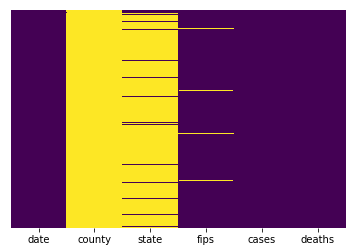

In [126]:
sns.heatmap(US.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [129]:
US[['date', 'fips', 'cases', 'deaths']] = US[['date', 'fips', 'cases', 'deaths']].fillna(0)

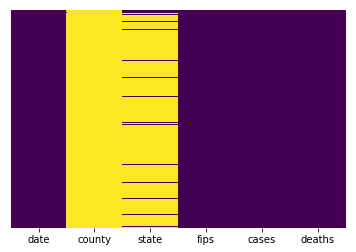

In [130]:
sns.heatmap(US.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [131]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder() 
US.iloc[:, 1] = labelencoder_X.fit_transform(US.iloc[:, 1])

In [132]:
US['day']=pd.DatetimeIndex(US['date']).day
US['year'] = pd.DatetimeIndex(US['date']).year
US['month'] = pd.DatetimeIndex(US['date']).month
US.head()

,date,county,state,fips,cases,deaths,day,year,month
0,2020-01-21,0,1.0,53061.0,1,0,21,2020,1
1,2020-01-22,0,1.0,53061.0,1,0,22,2020,1
2,2020-01-23,0,1.0,53061.0,1,0,23,2020,1
3,2020-01-24,1,2.0,17031.0,1,0,24,2020,1
4,2020-01-24,0,1.0,53061.0,1,0,24,2020,1


In [133]:
US.columns

Index(['date', 'county', 'state', 'fips', 'cases', 'deaths', 'day', 'year',
       'month'],
      dtype='object')

In [134]:
US.head()


,date,county,state,fips,cases,deaths,day,year,month
0,2020-01-21,0,1.0,53061.0,1,0,21,2020,1
1,2020-01-22,0,1.0,53061.0,1,0,22,2020,1
2,2020-01-23,0,1.0,53061.0,1,0,23,2020,1
3,2020-01-24,1,2.0,17031.0,1,0,24,2020,1
4,2020-01-24,0,1.0,53061.0,1,0,24,2020,1


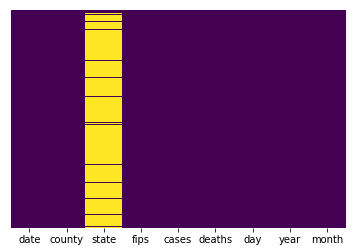

In [135]:
sns.heatmap(US.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [136]:
US.groupby('date')["day","year","month"].sum()

,day,year,month
date,,,
2020-01-21,21,2020,1
2020-01-22,22,2020,1
2020-01-23,23,2020,1
2020-01-24,48,4040,2
2020-01-25,75,6060,3
2020-01-26,130,10100,5
2020-01-27,135,10100,5
2020-01-28,140,10100,5
2020-01-29,145,10100,5


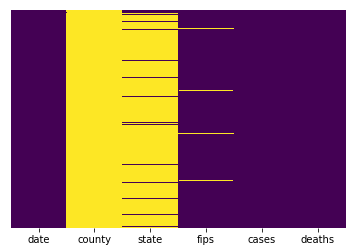

In [40]:
sns.heatmap(US.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [137]:
US.groupby('date')["day","year","month"].max()

,day,year,month
date,,,
2020-01-21,21,2020,1
2020-01-22,22,2020,1
2020-01-23,23,2020,1
2020-01-24,24,2020,1
2020-01-25,25,2020,1
2020-01-26,26,2020,1
2020-01-27,27,2020,1
2020-01-28,28,2020,1
2020-01-29,29,2020,1


In [138]:
US_per_day = US.groupby('date')['day','year','month'].max()

In [139]:
US_per_day.head()

,day,year,month
date,,,
2020-01-21,21,2020,1
2020-01-22,22,2020,1
2020-01-23,23,2020,1
2020-01-24,24,2020,1
2020-01-25,25,2020,1


In [140]:
US_per_day.describe()

,day,year,month
count,74.000000,74.0,74.000000
mean,16.527027,2020.0,2.351351
std,9.303443,0.0,0.783956
min,1.000000,2020.0,1.000000
25%,8.250000,2020.0,2.000000
50%,17.500000,2020.0,2.000000
75%,24.750000,2020.0,3.000000
max,31.000000,2020.0,4.000000


In [141]:
US_per_day['day'].max()

31

In [142]:
US_per_day['month'].max()

4

In [143]:
US_per_day['year'].max()

2020

In [144]:
US['county'].value_counts()

1        76
0        74
16386     1
21856     1
19779     1
30020     1
25926     1
27975     1
5448      1
7497      1
1354      1
3403      1
13644     1
15693     1
9550      1
11599     1
23905     1
23873     1
17762     1
19811     1
30052     1
25958     1
28007     1
5480      1
7529      1
1386      1
3435      1
13676     1
15725     1
9582      1
         ..
17085     1
19132     1
29371     1
25273     1
21119     1
10896     1
8849      1
14994     1
12947     1
2708      1
661       1
6806      1
4759      1
27288     1
25241     1
29339     1
19100     1
17053     1
23198     1
21151     1
10928     1
8881      1
15026     1
12979     1
2740      1
693       1
6838      1
4791      1
27320     1
8172      1
Name: county, Length: 30695, dtype: int64

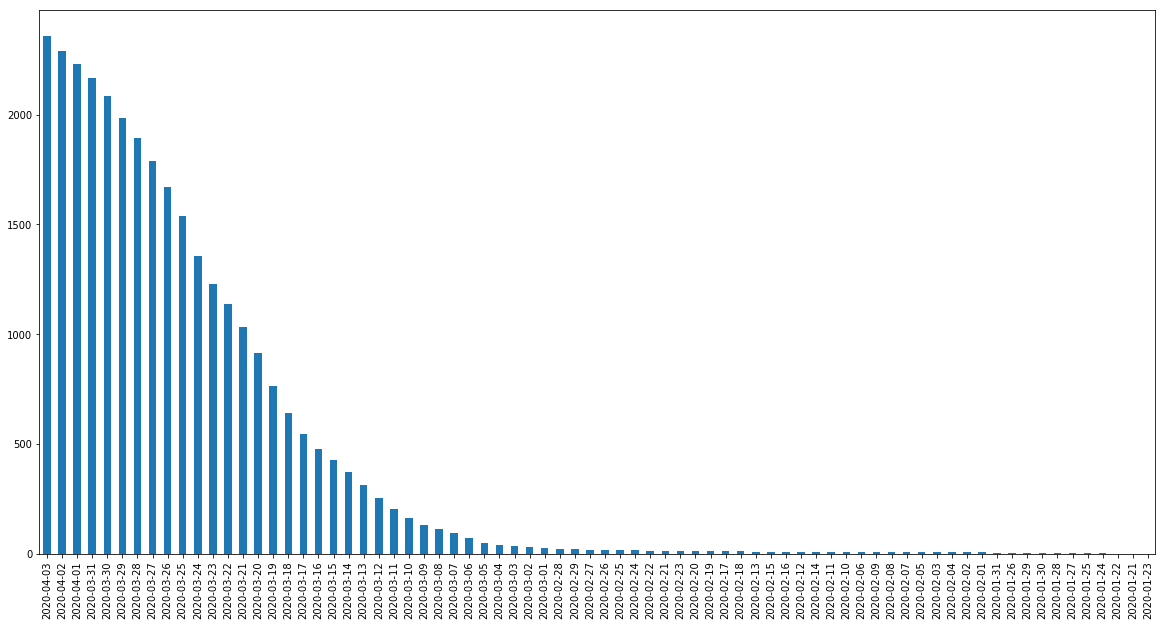

In [102]:
US['date'].value_counts().plot(kind='bar',figsize=(20,10))

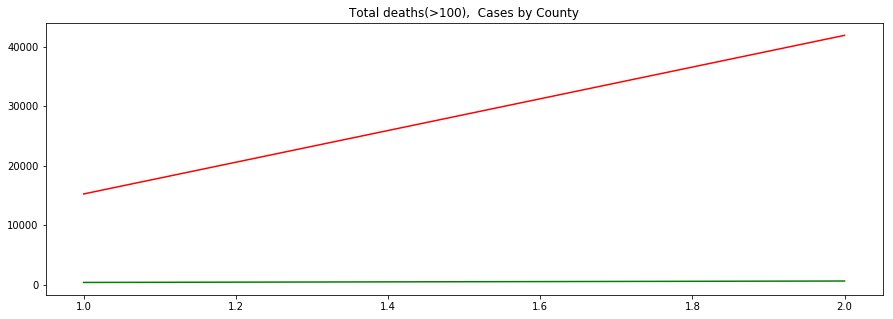

In [45]:

 
group_data = US.groupby(["county"])["deaths", "cases"].sum().reset_index()
group_data = group_data.sort_values(by='deaths', ascending=False)
group_data = group_data[group_data['deaths']>100]
plt.figure(figsize=(15, 5))
plt.plot(group_data['county'], group_data['cases'],color='red')
plt.plot(group_data['county'], group_data['deaths'],color='green')

 
plt.title('Total deaths(>100),  Cases by County')
plt.show()


[4.46412600e+01 2.16208597e-01 5.95152416e+05]
Predictions:
04/10/2020: 475024
04/11/2020: 494428
04/12/2020: 511251
04/13/2020: 525660


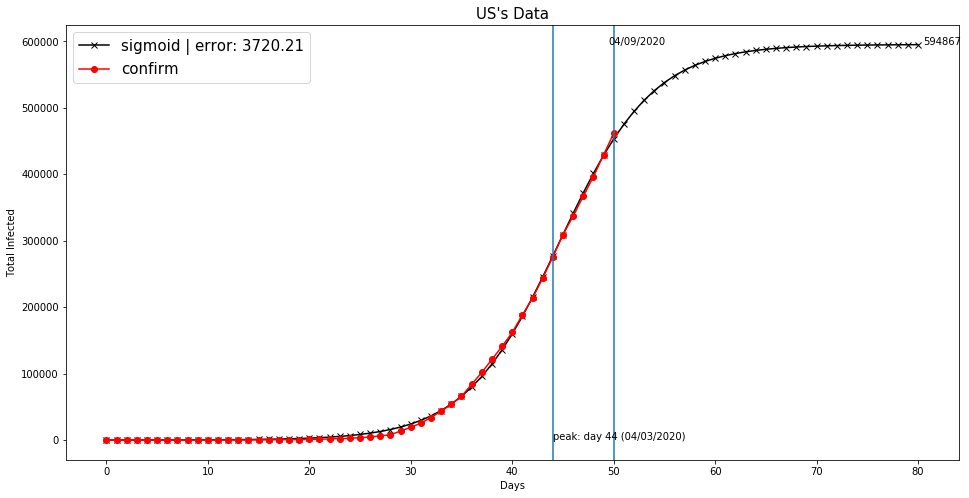

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.optimize import curve_fit
from datetime import datetime, timedelta
data=pd.read_csv("covid_19_data.csv")
data=data.drop('Last Update', axis=1)
data=data.drop("SNo",axis=1)
data=data.rename(columns={"ObservationDate": "date", "Country/Region": "country", "Province/State": "state","Confirmed":"confirm","Deaths": "death","Recovered":"recover"})
def plot_predict(country, stat, future_days):
    def avg_err(pcov):
        return np.round(np.sqrt(np.diag(pcov)).mean(), 2)
    # function to be minimized
    def f_sigmoid(x, a, b, c):
        # a = sigmoid midpoint
        # b = curve steepness (logistic growth)
        # c = max value
        return (c / (1 + np.exp(-b*(x-a))))
  
    inception = 0
    # hardcoding day 0 for several countries based on observations
    if country=="South Korea": inception = 8
    if country=="US": inception = 28
    if country=="Italy": inception = 20
    country_data = data[data["country"]==country].iloc[: , [0, 2, 3 ,4, 5]].copy()
    country_graph = country_data.groupby("date")[['confirm', 'death', 'recover']].sum().reset_index()[inception:]
    y = country_graph[stat]
    x = np.arange(len(y))
    
    # fitting the data on the logistic function
    popt_sig, pcov_sig = curve_fit(f_sigmoid, x, y, method='dogbox', bounds=([12., 0.001, y.mean()],[60., 2.5, 10*y.max()]))
    print(popt_sig)
    peakday = datetime.strftime(datetime.strptime(country_graph["date"][inception], "%m/%d/%Y")+timedelta(days=int(popt_sig[0])), "%m/%d/%Y")
    plt.figure(figsize=(16,8))
    
    x_m = np.arange(len(y)+future_days)
    y_m = f_sigmoid(x_m, *popt_sig)
    print("Predictions:")
    for i in range(1,5):
        pday = datetime.strftime(datetime.strptime(country_graph["date"][inception], "%m/%d/%Y")+timedelta(days=len(y)+i-1), "%m/%d/%Y")
        print("%s: %d" % (pday, y_m[len(y)+i-1]))
    #print(country_graph)
    
    # creating the matplotlib visualization
    plt.plot(x_m, y_m, c='k', marker="x", label="sigmoid | error: "+str(avg_err(pcov_sig))) 
    plt.text(x_m[-1]+.5, y_m[-1], str(int(y_m[-1])), size = 10)
    
    plt.plot(x, y, c='r', marker="o", label = stat)
    plt.xlabel("Days")
    plt.ylabel("Total Infected")
    plt.legend(prop={'size': 15})
    plt.title(country+"'s Data", size=15)
    plt.axvline(x[-1])
    plt.text(x[-1]-.5, y_m[-1], str(country_graph["date"][len(y)+inception-1]), size = 10)
    plt.axvline(int(popt_sig[0]))
    plt.text(int(popt_sig[0]), 1, "peak: day " + str(int(popt_sig[0])) + " (" + peakday + ")", size = 10)
    plt.show()
# See the results for different countries
#plot_predict("Mainland China", "confirm", 10)
#plot_predict("South Korea", "confirm", 10)
plot_predict("US", "confirm", 30)
data=data.rename(columns={"ObservationDate": "date", "Country/Region": "country", "Province/State": "state","Confirmed":"confirm","Deaths": "death","Recovered":"recover"})

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=1)

In [27]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
logmode1 =LogisticRegression()
print(logmode1.fit(X_train ,y_train))


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [28]:
y_pred = logmode1.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred,[1,0])
print(confusion_matrix)

[[  56  518]
 [ 144 4948]]


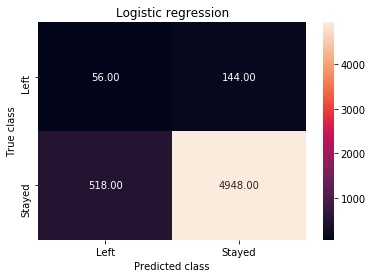

In [32]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic regression')
plt.savefig('US')

In [34]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logmode1.predict(X_test))))

Logistic regression accuracy: 0.811


In [36]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [46]:
from collections import Counter
 
# 3) given an array of nearest neighbours for a test case, tally up their classes to vote on test case class
 
def get_majority_vote(neighbours):
    # index 1 is the class
    classes = [neighbour[1] for neighbour in neighbours]
    count = Counter(classes)
    return count.most_common()[0][0]

In [63]:
from collections import Counter
from sklearn.datasets import load_US
 
# 3) given an array of nearest neighbours for a test case, tally up their classes to vote on test case class
 
def get_majority_vote(neighbours):
    # index 1 is the class
    classes = [neighbour[1] for neighbour in neighbours]
    count = Counter(classes)
    return count.most_common()[0][0]
from sklearn.metrics import classification_report, accuracy_score
 
# setting up main executable method
def main():
 
    # load the data and create the training and test sets
    # random_state = 1 is just a seed to permit reproducibility of the train/test split
    US = load_US()
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(US.data, US.target, test_size=0.4, random_state=1)
 
    # reformat train/test datasets for convenience
    train = np.array(zip(X_train,y_train))
    test = np.array(zip(X_test, y_test))
 
    # generate predictions
    predictions = []
 
    # let's arbitrarily set k equal to 5, meaning that to predict the class of new instances,
    k = 5
 
    # for each instance in the test set, get nearest neighbours and majority vote on predicted class
    for x in range(len(X_test)):
 
            print ('Classifying test instance number ' + str(x) + ":")
            neighbours = get_neighbours(training_set=train, test_instance=test[x][0], k=5)
            majority_vote = get_majority_vote(neighbours)
            predictions.append(majority_vote)
            print ('Predicted label=' + str(majority_vote) + ', Actual label=' + str(test[x][1]))
 
    # summarize performance of the classification
    print ('\nThe overall accuracy of the model is: ' + str(accuracy_score(y_test, predictions)) + "\n")
    report = classification_report(y_test, predictions, target_names = US.target_names)
    print ('A detailed classification report: \n\n' + report)
 
if __name__ == "__main__":
    main()

ImportError: cannot import name 'load_US' from 'sklearn.datasets' (C:\Users\hp\Anaconda3\lib\site-packages\sklearn\datasets\__init__.py)